## **Introduction**  

Savvy real estate investors have been leveraging the short-term rental business model of Airbnb for years. As restrictions on this market have tightened, however, investors must make informed decisions to profit from their home rentals. This project focused on analysis of the Airbnb market in Broward County, Florida, an ocean-side community with 18,000+ short term rentals. The objective of this analysis was two-fold:  

1) Identify the most important property attributes affecting property daily listing price 
2) Recommend the ideal investment location within the Broward county area to maximize yearly revenue  

The dataset was sourced from [insideairnbnb.com](https://insideairbnb.com/get-the-data/), an open-source website containing data scraped directly from Airbnb's website. 

# <u>**Objective I: Most Important Property Features Impacting Listing Price**<u>

## **1) Initial Data Import & Cleaning**

After loading the listing.csv file (December 2023 revision) the relevant variables were cleaned, standardized, and extracted to inform further analysis. 



In [1]:
import pandas as pd
import geopandas as gpd

# Define file paths (update these paths based on your local directory)
file_paths = {
    "listings": "data/listings.csv.gz",
    "calendar": "data/calendar.csv.gz",
    "reviews": "data/reviews.csv.gz",
    "listings_summary": "data/listings.csv",
    "reviews_summary": "data/reviews.csv",
    "neighbourhoods": "data/neighbourhoods.csv",
    "neighbourhoods_geojson": "data/neighbourhoods.geojson"
}

# Load files into individual dataframes
listings = pd.read_csv(file_paths["listings"], low_memory=False)
calendar = pd.read_csv(file_paths["calendar"], low_memory=False)
reviews = pd.read_csv(file_paths["reviews"], low_memory=False)
listings_summary = pd.read_csv(file_paths["listings_summary"], low_memory=False)
reviews_summary = pd.read_csv(file_paths["reviews_summary"], low_memory=False)
neighbourhoods = pd.read_csv(file_paths["neighbourhoods"], low_memory=False)
neighbourhoods_geojson = gpd.read_file(file_paths["neighbourhoods_geojson"])

# Display summary and head of each dataframe
dataframes = {
    "listings": listings,
    "calendar": calendar,
    "reviews": reviews,
    "listings_summary": listings_summary,
    "reviews_summary": reviews_summary,
    "neighbourhoods": neighbourhoods,
    "neighbourhoods_geojson": neighbourhoods_geojson
}

In [2]:
listings.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,57818,https://www.airbnb.com/rooms/57818,20231225202534,2023-12-26,city scrape,Home in Hollywood · ★4.63 · 2 bedrooms · 2 bed...,NaN,Check-in window<br />After 3:00 PM<br />Edit<b...,https://a0.muscache.com/pictures/miso/Hosting-...,275948,...,4.97,4.88,4.71,NaN,f,2,2,0,0,0.43
1,69824,https://www.airbnb.com/rooms/69824,20231225202534,2023-12-26,city scrape,Rental unit in Hallandale · ★4.0 · 2 bedrooms ...,NaN,NaN,https://a0.muscache.com/pictures/443102/f6b94e...,351303,...,4.75,5.00,4.50,NaN,f,2,2,0,0,0.12
2,83449,https://www.airbnb.com/rooms/83449,20231225202534,2023-12-27,city scrape,Rental unit in Dania Beach · ★4.77 · 2 bedroom...,NaN,"Residential neighborhood, less than 2 miles to...",https://a0.muscache.com/pictures/8c21bda0-5194...,454736,...,4.90,4.81,4.87,NaN,f,15,15,0,0,0.21
3,105411,https://www.airbnb.com/rooms/105411,20231225202534,2023-12-26,city scrape,Rental unit in Southwest Ranches · ★5.0 · 3 be...,NaN,"Very close to I75, one of the main highways. Y...",https://a0.muscache.com/pictures/787317/2cc18e...,532930,...,5.00,4.25,5.00,NaN,f,1,1,0,0,0.03
4,129099,https://www.airbnb.com/rooms/129099,20231225202534,2023-12-26,city scrape,Condo in Hollywood · ★4.29 · 1 bedroom · 2 bed...,NaN,NaN,https://a0.muscache.com/pictures/828393/baabb6...,637272,...,4.32,4.54,4.08,NaN,f,5,5,0,0,0.18


**Getting Number of Bedrooms and bathrooms**  

The _Listings_ file that was the primary data source for the analysis. Curiously, none of the original data columns contains a bedroom quantity, only the total number of beds in the property. To find the number of bedrooms for each propery, the Airbnb listing title was scraped to extract the number of bedrooms.   

The bathroom quantity was extracted from the _bathroom_text_ column via a similar methodology.

In [3]:
import re

# Function to extract number of bedrooms
def extract_bedrooms(description):
    if 'studio' in description.lower():
        return 1
    match = re.search(r'(\d+)\s*bedroom', description, re.IGNORECASE)
    if match:
        return int(match.group(1))
    else:
        match = re.search(r'(\d+)\s*bedrooms', description, re.IGNORECASE)
        if match:
            return int(match.group(1))
    return None

# Apply the function to create the 'bedrooms_name' column
listings['bedrooms_name'] = listings['name'].apply(extract_bedrooms)

# Display the first 10 observations including the new 'bedrooms_name' column
df_with_bedrooms = listings[['beds', 'accommodates', 'name', 'bedrooms_name']].head(10)
print(df_with_bedrooms)

# Print the statistics of the 'bedrooms_name' column
print("\nStatistics of the 'bedrooms_name' column:")
print(listings['bedrooms_name'].describe())

# Display the min and max values
min_bedrooms = listings['bedrooms_name'].min()
max_bedrooms = listings['bedrooms_name'].max()
print(f"\nMinimum number of bedrooms: {min_bedrooms}")
print(f"Maximum number of bedrooms: {max_bedrooms}")


listings_cleaned = listings

   beds  accommodates                                               name  \
0   2.0             4  Home in Hollywood · ★4.63 · 2 bedrooms · 2 bed...   
1   4.0             6  Rental unit in Hallandale · ★4.0 · 2 bedrooms ...   
2   3.0             5  Rental unit in Dania Beach · ★4.77 · 2 bedroom...   
3   3.0             5  Rental unit in Southwest Ranches · ★5.0 · 3 be...   
4   2.0             5  Condo in Hollywood · ★4.29 · 1 bedroom · 2 bed...   
5   2.0             4  Rental unit in Deerfield Beach · ★4.25 · 1 bed...   
6   7.0            10  Home in Hollywood · ★4.81 · 4 bedrooms · 7 bed...   
7   1.0             5  Rental unit in Hollywood · ★4.93 · 1 bedroom ·...   
8   2.0             3  Rental unit in Dania Beach · ★4.58 · 1 bedroom...   
9   2.0             4  Home in Hollywood · ★4.84 · 2 bedrooms · 2 bed...   

   bedrooms_name  
0            2.0  
1            2.0  
2            2.0  
3            3.0  
4            1.0  
5            1.0  
6            4.0  
7          

In [4]:
import numpy as np 

def convert_bathrooms(bathrooms_text):
    if pd.isna(bathrooms_text):
        return np.nan
    if 'half-bath' in bathrooms_text.lower():
        return 0.5
    else:
        # Extract the numeric part
        number = float(bathrooms_text.split()[0])
        return number

# Apply the function to create a new column
listings_cleaned['bathrooms'] = listings_cleaned['bathrooms_text'].apply(convert_bathrooms)

# Display the min and max values
min_bedrooms = listings_cleaned['bedrooms_name'].min()
max_bedrooms = listings_cleaned['bedrooms_name'].max()
print(f"\nMinimum number of bedrooms: {min_bedrooms}")
print(f"Maximum number of bedrooms: {max_bedrooms}")


Minimum number of bedrooms: 1.0
Maximum number of bedrooms: 15.0


**Additional Cleaning, Extraction, and Imputation**  

Additional actions focused on removing unneccessary columns, removing string artifacts from numerical columns (such as removing _$_ from the price column), and similar modifications to prepare the dataset for further analysis. 

In [5]:

# Remove unnecessary columns from the listings dataframe
columns_to_remove = [
    "listing_url", "scrape_id", "last_scraped", "source", "description",
    "neighborhood_overview", "picture_url", "host_url", "host_about",
    "host_thumbnail_url", "host_picture_url", "host_neighbourhood",
    "neighbourhood", "neighbourhood_group_cleansed", "bathrooms",
    "amenities", "calendar_updated", "calendar_last_scraped",
    "license", "instant_bookable", "host_verifications", "property_type", "name",
    "minimum_minimum_nights", "maximum_minimum_nights", "minimum_maximum_nights",
    "maximum_maximum_nights", "minimum_nights_avg_ntm", "maximum_nights_avg_ntm",
    "calculated_host_listings_count", "calculated_host_listings_count_entire_homes",
    "calculated_host_listings_count_private_rooms", "calculated_host_listings_count_shared_rooms",
    "beds",
]

listings_cleaned = listings.drop(columns=columns_to_remove)

# Replace 'bedrooms' column with 'bedrooms_name' column
listings_cleaned['bedrooms'] = listings['bedrooms_name']
listings_cleaned.drop(columns=['bedrooms_name'], inplace=True)

# Clean the price column by removing dollar signs and converting to numeric
listings_cleaned['price'] = listings_cleaned['price'].replace('[\$,]', '', regex=True).astype(float)

# Extract numeric values from bathrooms_text and create a new bathrooms column
listings_cleaned['bathrooms'] = listings_cleaned['bathrooms_text'].str.extract('(\d+(\.\d+)?)')[0].astype(float)

# Drop the old bathrooms_text column
listings_cleaned.drop(columns=['bathrooms_text'], inplace=True)

# Calculate vacancy and booking rates
listings_cleaned['vacancy_rate_30'] = listings_cleaned['availability_30'] / 30
listings_cleaned['vacancy_rate_60'] = listings_cleaned['availability_60'] / 60
listings_cleaned['vacancy_rate_90'] = listings_cleaned['availability_90'] / 90
listings_cleaned['vacancy_rate_365'] = listings_cleaned['availability_365'] / 365

# Display the first 5 rows of the cleaned dataframe
# Set display options to show all columns
pd.set_option('display.max_columns', None)

# Display the first 5 rows of the listings_cleaned dataframe with all columns
listings_cleaned.head()

,id,host_id,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bedrooms,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,bathrooms,vacancy_rate_30,vacancy_rate_60,vacancy_rate_90,vacancy_rate_365
0,57818,275948,Von Inc,2010-11-01,"Hollywood, FL",within an hour,100%,96%,t,3.0,3.0,t,t,Hollywood,26.01859,-80.12430,Entire home/apt,4,2.0,190.0,32,1125,t,2,2,10,214,58,1,0,2013-01-03,2023-03-31,4.63,4.69,4.61,5.00,4.97,4.88,4.71,0.43,1.0,0.066667,0.033333,0.111111,0.586301
1,69824,351303,Tracy,2011-01-17,"Silver Spring, MD",within an hour,100%,50%,f,3.0,5.0,t,t,Hallandale Beach,25.97641,-80.12052,Entire home/apt,6,2.0,140.0,30,365,t,19,19,19,281,4,2,0,2021-03-27,2023-06-03,4.00,4.50,4.00,4.75,4.75,5.00,4.50,0.12,2.0,0.633333,0.316667,0.211111,0.769863
2,83449,454736,"Jon, Mary Pop Apartments",2011-03-21,"Dania Beach, FL",within an hour,100%,97%,f,17.0,20.0,t,t,Dania Beach,26.03392,-80.14201,Entire home/apt,5,2.0,127.0,7,180,t,0,1,1,1,31,9,1,2011-11-01,2023-12-17,4.77,4.87,4.84,4.94,4.90,4.81,4.87,0.21,1.0,0.000000,0.016667,0.011111,0.002740
3,105411,532930,Sonia,2011-04-25,"Southwest Ranches, FL",within an hour,80%,57%,f,3.0,3.0,t,t,Southwest Ranches,26.04750,-80.36668,Entire home/apt,5,3.0,235.0,4,180,t,24,54,84,359,4,0,0,2012-08-06,2018-03-28,5.00,5.00,5.00,5.00,5.00,4.25,5.00,0.03,2.0,0.800000,0.900000,0.933333,0.983562
4,129099,637272,Bianca,2011-05-28,"Buenos Aires, Argentina",a few days or more,36%,18%,f,9.0,19.0,t,t,Hollywood,25.99414,-80.11814,Entire home/apt,5,1.0,324.0,20,365,t,6,18,29,304,27,0,0,2011-08-23,2022-07-01,4.29,4.42,4.24,4.44,4.32,4.54,4.08,0.18,1.5,0.200000,0.300000,0.322222,0.832877


**Handling Missing Values**  

The dataset had a number of missing values which needed to be accounted for and managed appropriately. Analysis of the extent of missing data was conducted first.  


To clean the data, mean or median values were imputed into numerical columns where possible and missing values were added for categorical columns with appropriate placeholders. In cases where neither option was feasible the row was removed.

In [6]:
# Display the count of NA values for each column in the listings_cleaned dataframe
na_counts = listings_cleaned.isna().sum()

# Display columns with their respective NA counts
print("NA values in each column:")
print(na_counts)

NA values in each column:
id                                0
host_id                           0
host_name                         4
host_since                        4
host_location                  4732
host_response_time             1958
host_response_rate             1958
host_acceptance_rate           1428
host_is_superhost                21
host_listings_count               4
host_total_listings_count         4
host_has_profile_pic              4
host_identity_verified            4
neighbourhood_cleansed            0
latitude                          0
longitude                         0
room_type                         0
accommodates                      0
bedrooms                         31
price                           773
minimum_nights                    0
maximum_nights                    0
has_availability                773
availability_30                   0
availability_60                   0
availability_90                   0
availability_365                  0
nu

In [7]:
# Remove any non-numeric characters (like '$' or commas) from the 'price' column and convert to numeric
listings_cleaned['price'] = listings_cleaned['price'].replace({'\$': '', ',': ''}, regex=True)
listings_cleaned['price'] = pd.to_numeric(listings_cleaned['price'], errors='coerce')

In [8]:
# Clean 'host_response_rate' and 'host_acceptance_rate', then convert to numeric
listings_cleaned[['host_response_rate', 'host_acceptance_rate']] = \
    listings_cleaned[['host_response_rate', 'host_acceptance_rate']].replace('%', '', regex=True)

# Apply pd.to_numeric to each column separately using .apply
listings_cleaned[['host_response_rate', 'host_acceptance_rate']] = listings_cleaned[['host_response_rate', 'host_acceptance_rate']].apply(
    pd.to_numeric, errors='coerce'
)

In [9]:
import numpy as np
from sklearn.impute import SimpleImputer

# Define columns to clean and remove 
critical_columns = [
    'bathrooms', 'bedrooms', 'host_name', 'host_since', 'host_listings_count',
    'host_total_listings_count', 'host_has_profile_pic', 'host_identity_verified', 'price'
]

# Define columns with too many missing values to remove
columns_to_remove = ['host_location', 'has_availability', 'first_review', 'last_review']

# Define review score columns for imputation
review_score_columns = [
    'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
    'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
    'review_scores_value', 'reviews_per_month'
]

# Remove rows with NA in bedrooms, bathrooms
listings_cleaned = listings_cleaned.dropna(subset=['bedrooms', 'bathrooms'])
# listings_cleaned = listings_cleaned[listings_cleaned['price'] <= 60000]

# Remove rows with NA in critical columns
listings_cleaned = listings_cleaned.dropna(subset=critical_columns)

# Drop columns with excessive missing values
listings_cleaned = listings_cleaned.drop(columns=columns_to_remove)

# Fill 'host_is_superhost' and missing host response fields
listings_cleaned['host_is_superhost'].fillna('f', inplace=True)
listings_cleaned[['host_response_time', 'host_response_rate', 'host_acceptance_rate']] = \
    listings_cleaned[['host_response_time', 'host_response_rate', 'host_acceptance_rate']].fillna('unreported')

# Clean 'host_response_rate' and 'host_acceptance_rate', then convert to numeric
listings_cleaned['host_response_rate'] = pd.to_numeric(
    listings_cleaned['host_response_rate'].replace('%', '', regex=True), errors='coerce'
)

listings_cleaned['host_acceptance_rate'] = pd.to_numeric(
    listings_cleaned['host_acceptance_rate'].replace('%', '', regex=True), errors='coerce'
)

# Impute review scores and response rates
imputer_mean = SimpleImputer(strategy='mean')
listings_cleaned[review_score_columns] = imputer_mean.fit_transform(listings_cleaned[review_score_columns])

imputer_median = SimpleImputer(strategy='median')
listings_cleaned[['host_response_rate', 'host_acceptance_rate']] = \
    imputer_median.fit_transform(listings_cleaned[['host_response_rate', 'host_acceptance_rate']])

print("\nNA values in each column after cleaning:")
print(listings_cleaned.isna().sum())

listings_cleaned.head()


NA values in each column after cleaning:
id                             0
host_id                        0
host_name                      0
host_since                     0
host_response_time             0
host_response_rate             0
host_acceptance_rate           0
host_is_superhost              0
host_listings_count            0
host_total_listings_count      0
host_has_profile_pic           0
host_identity_verified         0
neighbourhood_cleansed         0
latitude                       0
longitude                      0
room_type                      0
accommodates                   0
bedrooms                       0
price                          0
minimum_nights                 0
maximum_nights                 0
availability_30                0
availability_60                0
availability_90                0
availability_365               0
number_of_reviews              0
number_of_reviews_ltm          0
number_of_reviews_l30d         0
review_scores_rating           0
r

,id,host_id,host_name,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bedrooms,price,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,bathrooms,vacancy_rate_30,vacancy_rate_60,vacancy_rate_90,vacancy_rate_365
0,57818,275948,Von Inc,2010-11-01,within an hour,100.0,96.0,t,3.0,3.0,t,t,Hollywood,26.01859,-80.12430,Entire home/apt,4,2.0,190.0,32,1125,2,2,10,214,58,1,0,4.63,4.69,4.61,5.00,4.97,4.88,4.71,0.43,1.0,0.066667,0.033333,0.111111,0.586301
1,69824,351303,Tracy,2011-01-17,within an hour,100.0,50.0,f,3.0,5.0,t,t,Hallandale Beach,25.97641,-80.12052,Entire home/apt,6,2.0,140.0,30,365,19,19,19,281,4,2,0,4.00,4.50,4.00,4.75,4.75,5.00,4.50,0.12,2.0,0.633333,0.316667,0.211111,0.769863
2,83449,454736,"Jon, Mary Pop Apartments",2011-03-21,within an hour,100.0,97.0,f,17.0,20.0,t,t,Dania Beach,26.03392,-80.14201,Entire home/apt,5,2.0,127.0,7,180,0,1,1,1,31,9,1,4.77,4.87,4.84,4.94,4.90,4.81,4.87,0.21,1.0,0.000000,0.016667,0.011111,0.002740
3,105411,532930,Sonia,2011-04-25,within an hour,80.0,57.0,f,3.0,3.0,t,t,Southwest Ranches,26.04750,-80.36668,Entire home/apt,5,3.0,235.0,4,180,24,54,84,359,4,0,0,5.00,5.00,5.00,5.00,5.00,4.25,5.00,0.03,2.0,0.800000,0.900000,0.933333,0.983562
4,129099,637272,Bianca,2011-05-28,a few days or more,36.0,18.0,f,9.0,19.0,t,t,Hollywood,25.99414,-80.11814,Entire home/apt,5,1.0,324.0,20,365,6,18,29,304,27,0,0,4.29,4.42,4.24,4.44,4.32,4.54,4.08,0.18,1.5,0.200000,0.300000,0.322222,0.832877


**Initial Removal of Outliers**

Creating a histogram of housing Prices in Broward county shows a large number of outliers on the higher end. to improve analysis, we initially remove houses with a daily listing price higher than $6,000. More formal management of outliers in later steps will further bound this figure.

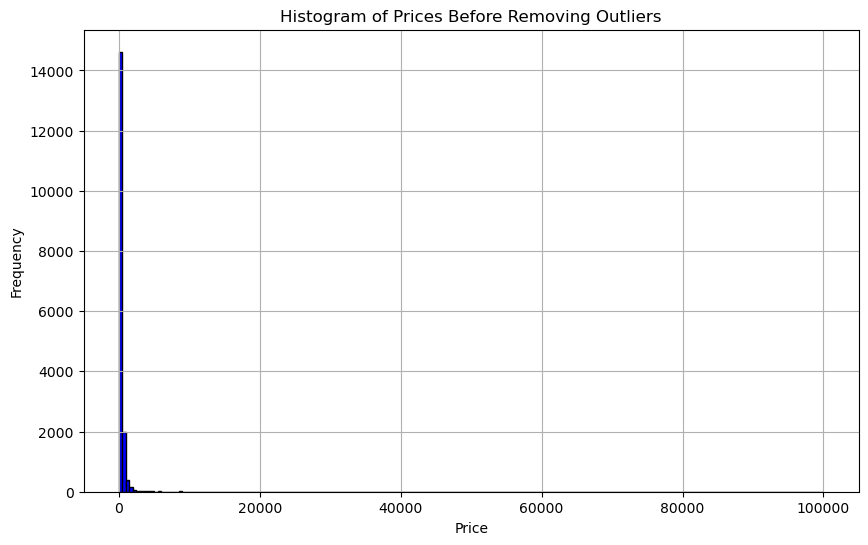

Number of observations removed: 46


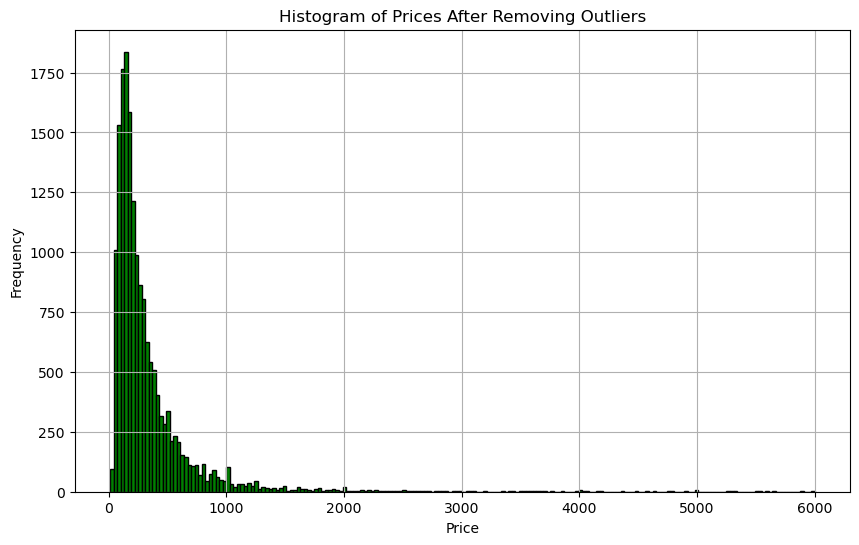

In [10]:
import matplotlib.pyplot as plt

# Plot histogram of the price column before removing outliers
plt.figure(figsize=(10, 6))
plt.hist(listings_cleaned['price'], bins=200, color='blue', edgecolor='black')
plt.title('Histogram of Prices Before Removing Outliers')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Move observations where price is above 6000
threshold_price = 6000
removed_observations = listings_cleaned[listings_cleaned['price'] > threshold_price]
listings_cleaned = listings_cleaned[listings_cleaned['price'] <= threshold_price]

# Print the number of observations removed
num_removed = removed_observations.shape[0]
print(f"Number of observations removed: {num_removed}")

# Plot histogram of the price column after removing outliers
plt.figure(figsize=(10, 6))
plt.hist(listings_cleaned['price'], bins=200, color='green', edgecolor='black')
plt.title('Histogram of Prices After Removing Outliers')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [11]:
listings_cleaned.head()

,id,host_id,host_name,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bedrooms,price,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,bathrooms,vacancy_rate_30,vacancy_rate_60,vacancy_rate_90,vacancy_rate_365
0,57818,275948,Von Inc,2010-11-01,within an hour,100.0,96.0,t,3.0,3.0,t,t,Hollywood,26.01859,-80.12430,Entire home/apt,4,2.0,190.0,32,1125,2,2,10,214,58,1,0,4.63,4.69,4.61,5.00,4.97,4.88,4.71,0.43,1.0,0.066667,0.033333,0.111111,0.586301
1,69824,351303,Tracy,2011-01-17,within an hour,100.0,50.0,f,3.0,5.0,t,t,Hallandale Beach,25.97641,-80.12052,Entire home/apt,6,2.0,140.0,30,365,19,19,19,281,4,2,0,4.00,4.50,4.00,4.75,4.75,5.00,4.50,0.12,2.0,0.633333,0.316667,0.211111,0.769863
2,83449,454736,"Jon, Mary Pop Apartments",2011-03-21,within an hour,100.0,97.0,f,17.0,20.0,t,t,Dania Beach,26.03392,-80.14201,Entire home/apt,5,2.0,127.0,7,180,0,1,1,1,31,9,1,4.77,4.87,4.84,4.94,4.90,4.81,4.87,0.21,1.0,0.000000,0.016667,0.011111,0.002740
3,105411,532930,Sonia,2011-04-25,within an hour,80.0,57.0,f,3.0,3.0,t,t,Southwest Ranches,26.04750,-80.36668,Entire home/apt,5,3.0,235.0,4,180,24,54,84,359,4,0,0,5.00,5.00,5.00,5.00,5.00,4.25,5.00,0.03,2.0,0.800000,0.900000,0.933333,0.983562
4,129099,637272,Bianca,2011-05-28,a few days or more,36.0,18.0,f,9.0,19.0,t,t,Hollywood,25.99414,-80.11814,Entire home/apt,5,1.0,324.0,20,365,6,18,29,304,27,0,0,4.29,4.42,4.24,4.44,4.32,4.54,4.08,0.18,1.5,0.200000,0.300000,0.322222,0.832877


## 3) Analysis of Price-Correlated Variables

In this step, we focus on cleaning and preparing our dataset to isolate the most important features for predicting the listing price. The process involves several key steps:

1. **Initial Data Cleaning**: We begin by examining the initial state of the dataframe and printing its shape and a sample of rows to understand its structure.

2. **Calculating Average Sub-Review Scores**: We calculate the average of several review scores to create a new feature called `sub_review_average`. This step helps to reduce the dimensionality of the dataset while retaining critical information about the reviews.

3. **Calculating Long-Term Vacancy Rate**: We calculate the long-term vacancy rate by averaging several vacancy rate columns. This new feature provides insight into the occupancy of the listing over different time periods.

4. **Removing Unnecessary Columns**: We remove additional columns that are either redundant or not useful for our analysis. This step helps simplify the dataset and focus on the most relevant features.

5. **Encoding Categorical Variables**: We use Target Encoding to convert categorical variables into numerical values. This step is crucial for machine learning models to process categorical data effectively.

6. **Feature Selection Based on Correlation**: We calculate the correlation matrix to identify which features are most strongly correlated with the target variable, price. Features with a low correlation are removed from the dataset.

7. **Visualizing Correlation with Price**: We visualize the correlation of each feature with the price before and after feature selection. This helps us understand the importance of each feature in predicting the price.

By following these steps, we ensure that our dataset is clean, relevant, and ready for building predictive models. The focus is on retaining only those features that have a significant impact on the listing price, thus improving the model's accuracy and interpretability.


In [12]:
# Create copy of initial cleaned listing dataframe for additional analysis 
listings_cleaned_reduced = listings_cleaned

# Debug print initial shape of the dataframe
print("Initial dataframe shape:", listings_cleaned_reduced.shape)
listings_cleaned_reduced.head()

Initial dataframe shape: (17337, 41)


,id,host_id,host_name,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bedrooms,price,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,bathrooms,vacancy_rate_30,vacancy_rate_60,vacancy_rate_90,vacancy_rate_365
0,57818,275948,Von Inc,2010-11-01,within an hour,100.0,96.0,t,3.0,3.0,t,t,Hollywood,26.01859,-80.12430,Entire home/apt,4,2.0,190.0,32,1125,2,2,10,214,58,1,0,4.63,4.69,4.61,5.00,4.97,4.88,4.71,0.43,1.0,0.066667,0.033333,0.111111,0.586301
1,69824,351303,Tracy,2011-01-17,within an hour,100.0,50.0,f,3.0,5.0,t,t,Hallandale Beach,25.97641,-80.12052,Entire home/apt,6,2.0,140.0,30,365,19,19,19,281,4,2,0,4.00,4.50,4.00,4.75,4.75,5.00,4.50,0.12,2.0,0.633333,0.316667,0.211111,0.769863
2,83449,454736,"Jon, Mary Pop Apartments",2011-03-21,within an hour,100.0,97.0,f,17.0,20.0,t,t,Dania Beach,26.03392,-80.14201,Entire home/apt,5,2.0,127.0,7,180,0,1,1,1,31,9,1,4.77,4.87,4.84,4.94,4.90,4.81,4.87,0.21,1.0,0.000000,0.016667,0.011111,0.002740
3,105411,532930,Sonia,2011-04-25,within an hour,80.0,57.0,f,3.0,3.0,t,t,Southwest Ranches,26.04750,-80.36668,Entire home/apt,5,3.0,235.0,4,180,24,54,84,359,4,0,0,5.00,5.00,5.00,5.00,5.00,4.25,5.00,0.03,2.0,0.800000,0.900000,0.933333,0.983562
4,129099,637272,Bianca,2011-05-28,a few days or more,36.0,18.0,f,9.0,19.0,t,t,Hollywood,25.99414,-80.11814,Entire home/apt,5,1.0,324.0,20,365,6,18,29,304,27,0,0,4.29,4.42,4.24,4.44,4.32,4.54,4.08,0.18,1.5,0.200000,0.300000,0.322222,0.832877


In [13]:
'''
# Calculate the average sub-review score
sub_review_columns = [
    'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
    'review_scores_communication', 'review_scores_location', 'review_scores_value', 'review_scores_rating'
]

# Average review scores across all relevant columns
listings_cleaned_reduced['sub_review_average'] = listings_cleaned_reduced[sub_review_columns].mean(axis=1)

# Drop the individual sub-review score columns
#listings_cleaned_reduced = listings_cleaned_reduced.drop(columns=sub_review_columns)

'''


"\n# Calculate the average sub-review score\nsub_review_columns = [\n    'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',\n    'review_scores_communication', 'review_scores_location', 'review_scores_value', 'review_scores_rating'\n]\n\n# Average review scores across all relevant columns\nlistings_cleaned_reduced['sub_review_average'] = listings_cleaned_reduced[sub_review_columns].mean(axis=1)\n\n# Drop the individual sub-review score columns\n#listings_cleaned_reduced = listings_cleaned_reduced.drop(columns=sub_review_columns)\n\n"

In [14]:
# Calculate the long-term vacancy rate
vacancy_rate_columns = [
    'vacancy_rate_365', 'vacancy_rate_60', 'vacancy_rate_90'
]
listings_cleaned_reduced['longterm_vacancy_rate'] = listings_cleaned_reduced[vacancy_rate_columns].mean(axis=1)

# Drop the individual vacancy rate columns
# listings_cleaned_reduced = listings_cleaned_reduced.drop(columns=vacancy_rate_columns)

# Define additional columns to remove
additional_columns_to_remove = [
    "id", "listing_id", "host_total_listings_count", "availability_60",
    "availability_30", "availability_90", "availability_365", "number_of_reviews_ltm", "host_id",
    "host_acceptance_rate", "maximum_nights", "longterm_vacancy_rate", "number_of_reviews"
]

# Only drop columns that exist in the DataFrame
existing_columns_to_remove = [col for col in additional_columns_to_remove if col in listings_cleaned_reduced.columns]

# Drop the existing columns
listings_cleaned_reduced = listings_cleaned_reduced.drop(columns=existing_columns_to_remove)

listings_cleaned_reduced.columns

Index(['host_name', 'host_since', 'host_response_time', 'host_response_rate',
       'host_is_superhost', 'host_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_cleansed', 'latitude',
       'longitude', 'room_type', 'accommodates', 'bedrooms', 'price',
       'minimum_nights', 'number_of_reviews_l30d', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'reviews_per_month',
       'bathrooms', 'vacancy_rate_30', 'vacancy_rate_60', 'vacancy_rate_90',
       'vacancy_rate_365'],
      dtype='object')

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import category_encoders as ce

In [16]:
# Encode categorical variables using Target Encoding
#categorical_cols = ['host_response_time', 'host_is_superhost', 'room_type']  # Add more categorical columns as needed
#target_col = 'price'

# Initialize the target encoder
#encoder = ce.TargetEncoder(cols=categorical_cols)

# Fit the encoder and transform the data
#listings_cleaned_reduced[categorical_cols] = encoder.fit_transform(listings_cleaned_reduced[categorical_cols], listings_cleaned_reduced[target_col])


listings_cleaned_reduced.head()



,host_name,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bedrooms,price,minimum_nights,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,bathrooms,vacancy_rate_30,vacancy_rate_60,vacancy_rate_90,vacancy_rate_365
0,Von Inc,2010-11-01,within an hour,100.0,t,3.0,t,t,Hollywood,26.01859,-80.12430,Entire home/apt,4,2.0,190.0,32,0,4.63,4.69,4.61,5.00,4.97,4.88,4.71,0.43,1.0,0.066667,0.033333,0.111111,0.586301
1,Tracy,2011-01-17,within an hour,100.0,f,3.0,t,t,Hallandale Beach,25.97641,-80.12052,Entire home/apt,6,2.0,140.0,30,0,4.00,4.50,4.00,4.75,4.75,5.00,4.50,0.12,2.0,0.633333,0.316667,0.211111,0.769863
2,"Jon, Mary Pop Apartments",2011-03-21,within an hour,100.0,f,17.0,t,t,Dania Beach,26.03392,-80.14201,Entire home/apt,5,2.0,127.0,7,1,4.77,4.87,4.84,4.94,4.90,4.81,4.87,0.21,1.0,0.000000,0.016667,0.011111,0.002740
3,Sonia,2011-04-25,within an hour,80.0,f,3.0,t,t,Southwest Ranches,26.04750,-80.36668,Entire home/apt,5,3.0,235.0,4,0,5.00,5.00,5.00,5.00,5.00,4.25,5.00,0.03,2.0,0.800000,0.900000,0.933333,0.983562
4,Bianca,2011-05-28,a few days or more,36.0,f,9.0,t,t,Hollywood,25.99414,-80.11814,Entire home/apt,5,1.0,324.0,20,0,4.29,4.42,4.24,4.44,4.32,4.54,4.08,0.18,1.5,0.200000,0.300000,0.322222,0.832877


In [17]:
# Calculate the old correlation matrix for only numeric columns
old_correlation_matrix = listings_cleaned_reduced.select_dtypes(include='number').corr()

# Set a threshold for correlation coefficient
correlation_threshold = 0.05

# Select features with absolute correlation above the threshold
important_features = old_correlation_matrix['price'].abs().loc[old_correlation_matrix['price'].abs() > correlation_threshold].index

# Identify and print the features that were removed
removed_features = [feature for feature in listings_cleaned_reduced.columns if feature not in important_features]
print("Features removed due to low correlation with price:")
print(removed_features)

# Reduce the dataframe to these important features
listings_cleaned_reduced = listings_cleaned_reduced[important_features]

# Display the remaining features
print("Remaining features after correlation-based feature selection:")
listings_cleaned_reduced.columns

# Calculate the new correlation matrix for only numeric columns
new_correlation_matrix = listings_cleaned_reduced.select_dtypes(include='number').corr()

Features removed due to low correlation with price:
['host_name', 'host_since', 'host_response_time', 'host_response_rate', 'host_is_superhost', 'host_listings_count', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood_cleansed', 'latitude', 'room_type', 'minimum_nights', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_value', 'vacancy_rate_30']
Remaining features after correlation-based feature selection:


In [18]:
# Print the old and new correlation matrices
print("\nOld Correlation Matrix:")
old_correlation_matrix.head()


Old Correlation Matrix:


,host_response_rate,host_listings_count,latitude,longitude,accommodates,bedrooms,price,minimum_nights,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,bathrooms,vacancy_rate_30,vacancy_rate_60,vacancy_rate_90,vacancy_rate_365
host_response_rate,1.000000,0.035012,0.015962,0.071106,0.056112,0.050313,0.039922,-0.031993,0.107237,0.076016,0.074755,0.068595,0.088873,0.086115,0.066601,0.060613,0.076919,0.034498,-0.133702,-0.117009,-0.108830,-0.059092
host_listings_count,0.035012,1.000000,0.014496,0.028687,0.072016,0.030177,0.000171,-0.008924,-0.097284,-0.039341,-0.041640,-0.030237,-0.050662,-0.053742,-0.022649,-0.043484,-0.043223,0.084907,0.064378,0.049869,0.050635,0.108379
latitude,0.015962,0.014496,1.000000,0.163638,-0.000145,0.064657,-0.001728,-0.009472,0.023356,0.133269,0.106960,0.150299,0.125651,0.103635,0.070423,0.131949,0.026373,0.026165,-0.056986,-0.096564,-0.114559,-0.042006
longitude,0.071106,0.028687,0.163638,1.000000,0.041577,-0.032594,0.100193,-0.015635,-0.006979,0.006356,0.013208,-0.002354,0.009855,0.019108,0.092272,0.001444,-0.000066,0.025721,-0.068645,-0.100486,-0.103466,0.045562
accommodates,0.056112,0.072016,-0.000145,0.041577,1.000000,0.861741,0.528920,-0.044657,-0.037743,0.065858,0.050580,0.039429,0.059207,0.047341,0.031351,0.043192,-0.013708,0.760082,-0.000320,0.007608,0.007101,0.071770


In [19]:
print("\nNew Correlation Matrix:")
new_correlation_matrix.head()


New Correlation Matrix:


,longitude,accommodates,bedrooms,price,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_location,reviews_per_month,bathrooms,vacancy_rate_60,vacancy_rate_90,vacancy_rate_365
longitude,1.000000,0.041577,-0.032594,0.100193,-0.006979,0.006356,0.013208,0.092272,-0.000066,0.025721,-0.100486,-0.103466,0.045562
accommodates,0.041577,1.000000,0.861741,0.528920,-0.037743,0.065858,0.050580,0.031351,-0.013708,0.760082,0.007608,0.007101,0.071770
bedrooms,-0.032594,0.861741,1.000000,0.554605,-0.029302,0.100095,0.081975,0.038581,-0.011454,0.856638,0.008263,0.009060,0.069368
price,0.100193,0.528920,0.554605,1.000000,-0.071042,0.063009,0.054579,0.070857,-0.052491,0.585339,0.053998,0.057014,0.089578
number_of_reviews_l30d,-0.006979,-0.037743,-0.029302,-0.071042,1.000000,0.111276,0.100630,0.052358,0.686596,-0.065226,-0.057389,-0.049419,-0.081217


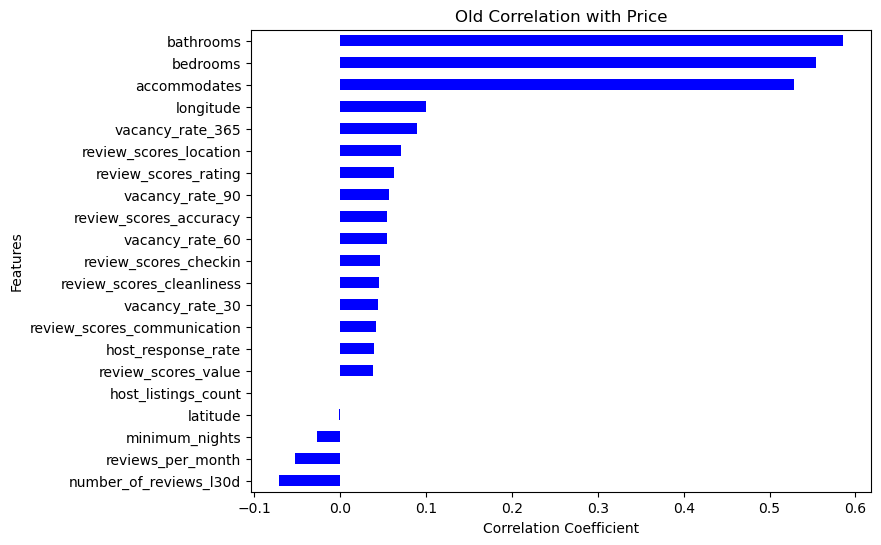

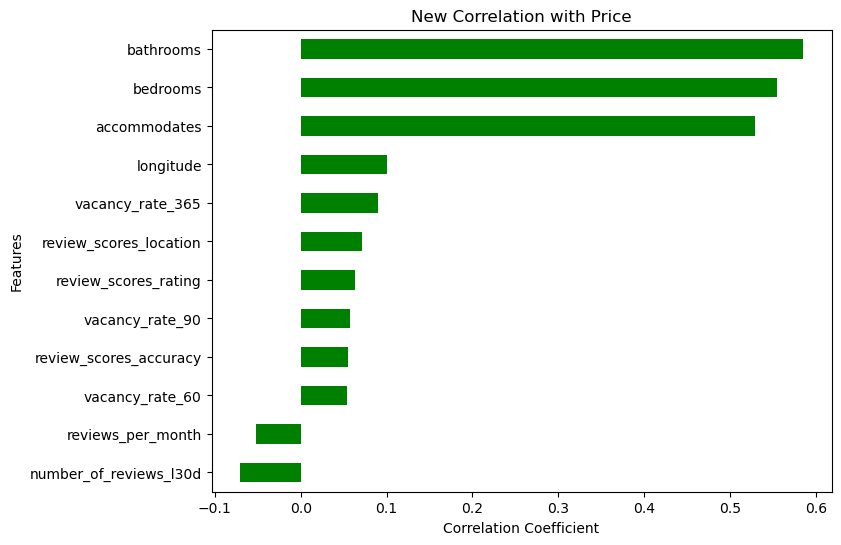

In [20]:
# Display the correlation matrix for price with other numerical columns as a bar plot
plt.figure(figsize=(8, 6))
old_correlation_matrix['price'].drop('price').sort_values().plot(kind='barh', color='blue')
plt.title('Old Correlation with Price')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()

plt.figure(figsize=(8, 6))
new_correlation_matrix['price'].drop('price').sort_values().plot(kind='barh', color='green')
plt.title('New Correlation with Price')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()


**Correlation Findings**  

After initial correlation, we see that bathrooms, bedrooms, room type, and longitude are the most correlated variables with daily listing price. Bathrooms and bedrooms are by far the most correlated with values of almost 0.6. 

It is no mystery the number of bedrooms / bathrooms would be a primary price determinant given that these are factors that guests often consider first when looking for accommodations. It is somewhat surprising that number of bathrooms is more correlated with price than bedrooms though. Overall, This is an important reminder to prioritize the number of bedrooms and bathrooms you want when purchasing or building an Airbnb property.

In [21]:
'''
import numpy as np

# Remove unnecessary columns
columns_to_remove = [
    "listing_url", "scrape_id", "last_scraped", "source", "description",
    "neighborhood_overview", "picture_url", "host_url", "host_about",
    "host_thumbnail_url", "host_picture_url", "host_neighbourhood", 'neighbourhood',
    "neighbourhood_group_cleansed", "bathrooms", "property_type",
    "amenities", "calendar_updated", "calendar_last_scraped",
    "license", "host_verifications", "name", "minimum_minimum_nights", 
    "maximum_minimum_nights", "minimum_maximum_nights", "maximum_maximum_nights",
    "minimum_nights_avg_ntm", "maximum_nights_avg_ntm", "calculated_host_listings_count", 
    "calculated_host_listings_count_entire_homes", "calculated_host_listings_count_private_rooms", 
    "calculated_host_listings_count_shared_rooms"
]

listings_cleaned = listings.drop(columns=columns_to_remove)

# Clean the price column by removing dollar signs and converting to numeric
listings_cleaned['price'] = listings_cleaned['price'].replace('[\$,]', '', regex=True).astype(float)

'''

'''
# Extract numeric values from bathrooms_text and create a new bathrooms column
#listings_cleaned['bathrooms'] = listings_cleaned['bathrooms_text'].str.extract('(\d+(\.\d+)?)')[0].astype(float)
# Drop the old bathrooms_text column
#listings_cleaned.drop(columns=['bathrooms_text'], inplace=True)

# Calculate vacancy and booking rates
listings_cleaned['vacancy_rate_30'] = listings_cleaned['availability_30'] / 30
listings_cleaned['vacancy_rate_60'] = listings_cleaned['availability_60'] / 60
listings_cleaned['vacancy_rate_90'] = listings_cleaned['availability_90'] / 90
listings_cleaned['vacancy_rate_365'] = listings_cleaned['availability_365'] / 365


# Display the first 5 rows of the cleaned dataframe
df_columns = np.array((listings_cleaned.columns))
df_columns.sort()

print(df_columns)
listings_cleaned.head(10)

'''

"\n# Extract numeric values from bathrooms_text and create a new bathrooms column\n#listings_cleaned['bathrooms'] = listings_cleaned['bathrooms_text'].str.extract('(\\d+(\\.\\d+)?)')[0].astype(float)\n# Drop the old bathrooms_text column\n#listings_cleaned.drop(columns=['bathrooms_text'], inplace=True)\n\n# Calculate vacancy and booking rates\nlistings_cleaned['vacancy_rate_30'] = listings_cleaned['availability_30'] / 30\nlistings_cleaned['vacancy_rate_60'] = listings_cleaned['availability_60'] / 60\nlistings_cleaned['vacancy_rate_90'] = listings_cleaned['availability_90'] / 90\nlistings_cleaned['vacancy_rate_365'] = listings_cleaned['availability_365'] / 365\n\n\n# Display the first 5 rows of the cleaned dataframe\ndf_columns = np.array((listings_cleaned.columns))\ndf_columns.sort()\n\nprint(df_columns)\nlistings_cleaned.head(10)\n\n"

In [22]:
'''
def convert_bathrooms(bathrooms_text):
    if pd.isna(bathrooms_text):
        return np.nan
    if 'half-bath' in bathrooms_text.lower():
        return 0.5
    else:
        # Extract the numeric part
        number = float(bathrooms_text.split()[0])
        return number

# Apply the function to create a new column
listings_cleaned['bathrooms'] = listings_cleaned['bathrooms_text'].apply(convert_bathrooms)

listings_cleaned

'''

"\ndef convert_bathrooms(bathrooms_text):\n    if pd.isna(bathrooms_text):\n        return np.nan\n    if 'half-bath' in bathrooms_text.lower():\n        return 0.5\n    else:\n        # Extract the numeric part\n        number = float(bathrooms_text.split()[0])\n        return number\n\n# Apply the function to create a new column\nlistings_cleaned['bathrooms'] = listings_cleaned['bathrooms_text'].apply(convert_bathrooms)\n\nlistings_cleaned\n\n"

# <u>**Objective II: Optimal Airbnb Location & Pricing**<u>

Now that we have a sense of some of the primary property features that impact pricing, we need to answer a number of quetions to inform further investment in Broward County. The three areas of exploration are as follow:

a) _Where within Broward County should you own a property to maximize daily revenue?_   

b)_What is the highest price you can justify charging for this property to maximize daily revenue?_  

c) What’s the expected daily revenue per bedroom for your property? 
- _Calculated as (price x 30-day occupancy rate) / (# bedrooms)_  

**Assumptions**  
- Assuming we want a property with 3-5 bedrooms  
- Ignoring costs of purchasing maintenance, cleaning, and maintenance

## **a) _Where within Broward County should you own a property to maximize daily revenue?_**

**Follow up: _Determine how vacancy rate is measured_**

Answer: vacancy rate is the forward looking count of the number of days the airbnb is not booked divided by the given time interval.  

E.g. vacancy_rate_30 is the number of unbooked days for an airbnb over the next 30 days expressed as a proportion. Likewise, vacancy_rate_365 is the number of unbooked days for the airbnb over the next 365 days (year) expressed as a proportion.

vacancy_rate_30 is used as the estimation of Airbnb bookings moving forward since it is the shortest forecast horizon and thus more likely to be accurate. Other longer time horizons such as  vacancy_rate_365 would most likely be less accurate given that the Airbnb bookings for the next year will most likely change as the year progresses and new guests book stays while others cancel. 

In [57]:
# Aggregate relevant data by neighbourhood
neighbourhoods_df = listings_cleaned.groupby('neighbourhood_cleansed').agg(
    price=('price', 'mean'),
    airbnb_count=('id', 'size'),
    vacancy_rate_30=('vacancy_rate_30', 'mean'),
    vacancy_rate_60=('vacancy_rate_60', 'mean'),
    vacancy_rate_90=('vacancy_rate_90', 'mean'),
    vacancy_rate_365=('vacancy_rate_365', 'mean')
).reset_index()

# Convert vacancy rates to occupancy rates
neighbourhoods_df['occupancy_rate_30'] = (1 - neighbourhoods_df['vacancy_rate_30']) 
neighbourhoods_df['occupancy_rate_60'] = (1 - neighbourhoods_df['vacancy_rate_60']) 
neighbourhoods_df['occupancy_rate_90'] = (1 - neighbourhoods_df['vacancy_rate_90']) 
neighbourhoods_df['occupancy_rate_365'] = (1 - neighbourhoods_df['vacancy_rate_365']) 

neighbourhoods_df.drop(['vacancy_rate_30', 'vacancy_rate_60', 'vacancy_rate_90', 'vacancy_rate_365'], axis=1, inplace=True)

# Round column values
neighbourhoods_df = neighbourhoods_df.round({
    'daily_price': 0,
    'occupancy_rate_30': 2,
    'occupancy_rate_60': 2,
    'occupancy_rate_90': 2,
    'occupancy_rate_365': 2
})

neighbourhoods_df.rename(columns={'price': 'daily_price'}, inplace=True)
neighbourhoods_df = neighbourhoods_df.sort_values('daily_price', ascending=False)

neighbourhoods_df

,neighbourhood_cleansed,daily_price,airbnb_count,occupancy_rate_30,occupancy_rate_60,occupancy_rate_90,occupancy_rate_365
15,Lighthouse Point,626.201923,104,0.64,0.60,0.56,0.39
26,Southwest Ranches,602.272727,33,0.46,0.39,0.36,0.38
20,Parkland,517.222222,18,0.61,0.61,0.57,0.57
23,Plantation,430.235023,217,0.49,0.43,0.39,0.38
11,Lauderdale By The Sea,402.741259,429,0.65,0.67,0.64,0.41
7,Fort Lauderdale,393.221667,4403,0.58,0.52,0.48,0.43
5,Davie,387.854545,165,0.59,0.50,0.45,0.50
1,Cooper City,338.625000,24,0.61,0.44,0.36,0.50
10,Hollywood,335.099769,4330,0.58,0.53,0.48,0.40
14,Lazy Lake,332.833333,6,0.73,0.65,0.61,0.45


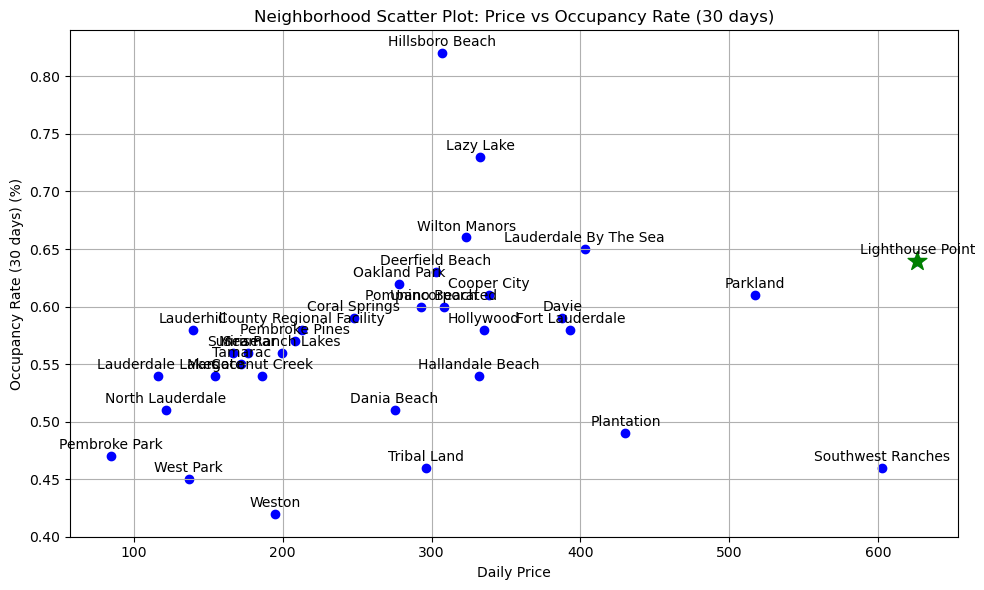

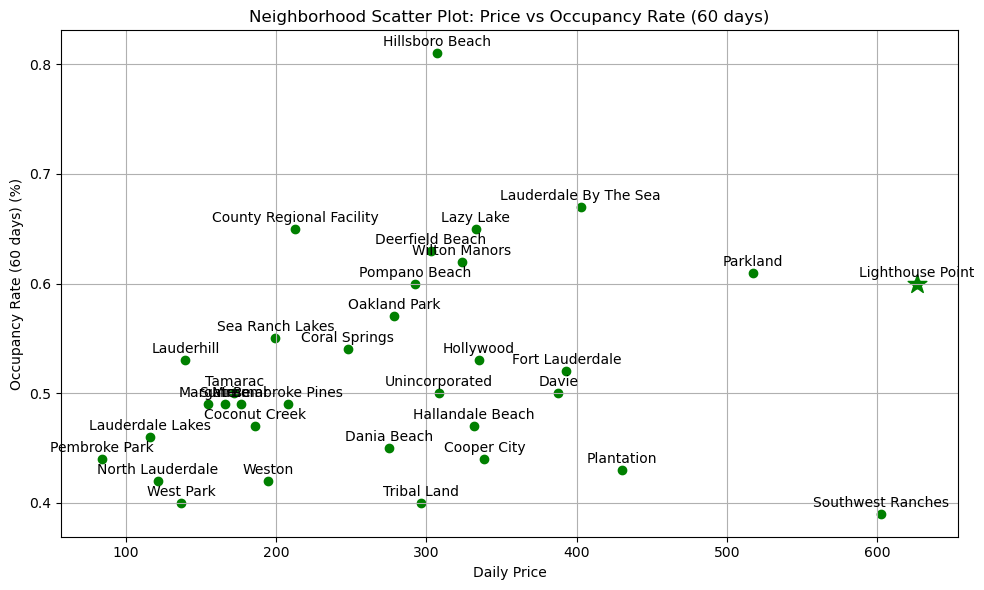

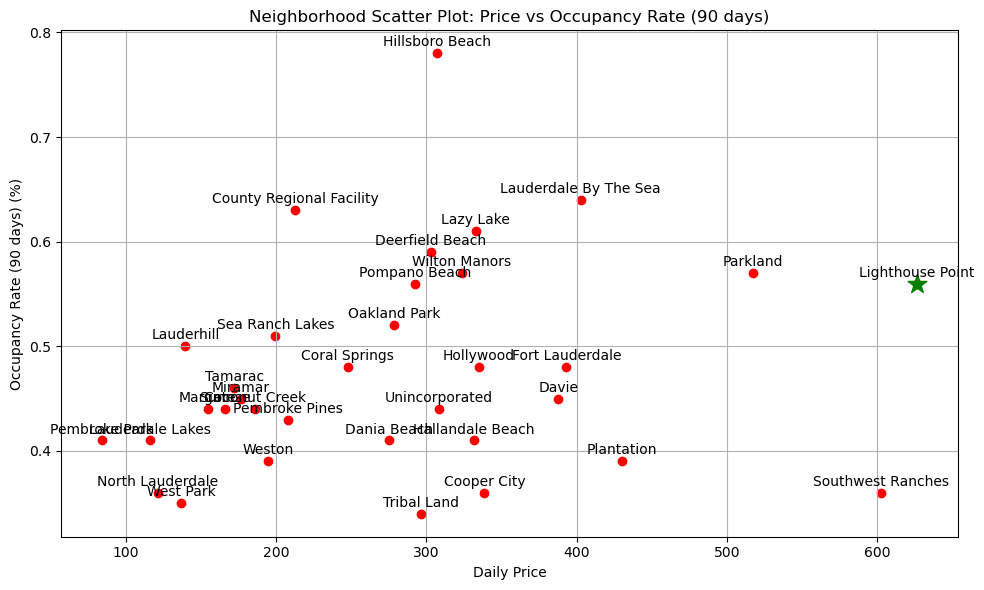

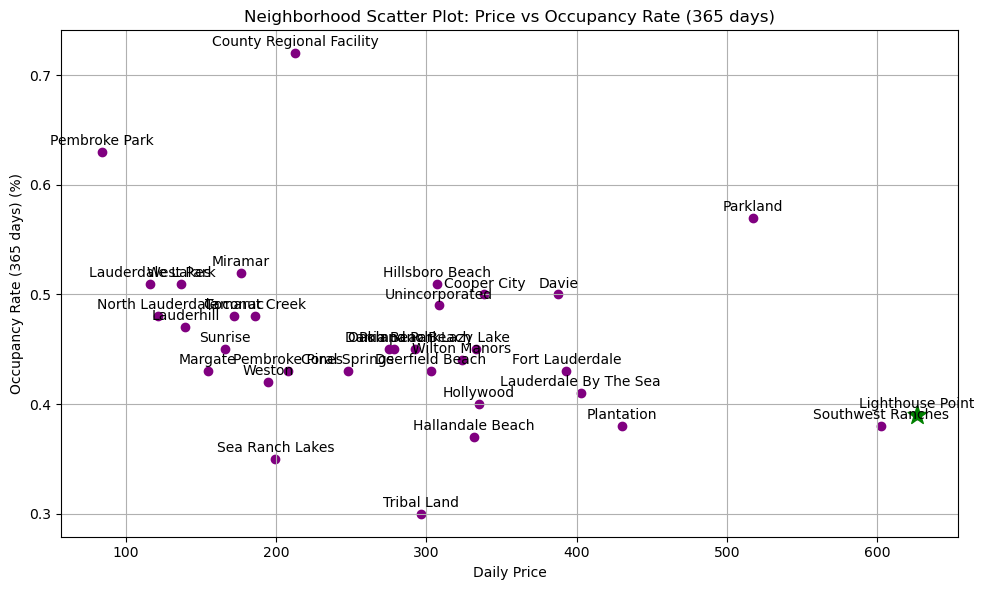

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to create annotated scatter plot
def plot_scatter_with_annotations(df, x_col, y_col, title, color):
    plt.figure(figsize=(10, 6))
    
    # create scatterplot
    plt.scatter(df[x_col], df[y_col], marker='o', color=color, label='Other Neighborhoods')

    # Highlight Lighthouse Point with green star
    lighthouse_point = df[df['neighbourhood_cleansed'] == 'Lighthouse Point']
    plt.scatter(lighthouse_point[x_col], lighthouse_point[y_col], marker='*', color='green', s=200, label='Lighthouse Point')

    # Add labels / title 
    plt.xlabel('Daily Price')
    plt.ylabel(f'Occupancy Rate ({title}) (%)')
    plt.title(f'Neighborhood Scatter Plot: Price vs Occupancy Rate ({title})')

    # Add neighborhood name for each data point
    for i in range(len(df)):
        plt.annotate(df['neighbourhood_cleansed'][i], 
                     (df[x_col][i], df[y_col][i]),
                     textcoords="offset points", xytext=(0,5), ha='center')
        
    
    # Show scatterplot
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Define individual parameters for each plot of differing occupancy time horizon
plots_info = [
    ('occupancy_rate_30', '30 days', 'blue'),
    ('occupancy_rate_60', '60 days', 'green'),
    ('occupancy_rate_90', '90 days', 'red'),
    ('occupancy_rate_365', '365 days', 'purple')
]

# Plot each occupancy time horizon 
for y_col, title, color in plots_info:
    plot_scatter_with_annotations(neighbourhoods_df, 'daily_price', y_col, title, color)

In [59]:
# Yearly revenue = (daily price * 30 days) * (30 day occupancy rate) * 12 months 
neighbourhoods_df['yearly_revenue'] = (neighbourhoods_df['occupancy_rate_30'] * neighbourhoods_df['daily_price'] * 30 * 12).round()

neighbourhoods_df = neighbourhoods_df.drop(['occupancy_rate_30', 'occupancy_rate_60', 'occupancy_rate_90', 'occupancy_rate_365'], axis=1)

neighbourhoods_df.sort_values('yearly_revenue', ascending = False)



,neighbourhood_cleansed,daily_price,airbnb_count,yearly_revenue
15,Lighthouse Point,626.201923,104,144277.0
20,Parkland,517.222222,18,113582.0
26,Southwest Ranches,602.272727,33,99736.0
11,Lauderdale By The Sea,402.741259,429,94241.0
9,Hillsboro Beach,306.833333,42,90577.0
14,Lazy Lake,332.833333,6,87469.0
5,Davie,387.854545,165,82380.0
7,Fort Lauderdale,393.221667,4403,82105.0
33,Wilton Manors,323.426945,527,76846.0
23,Plantation,430.235023,217,75893.0


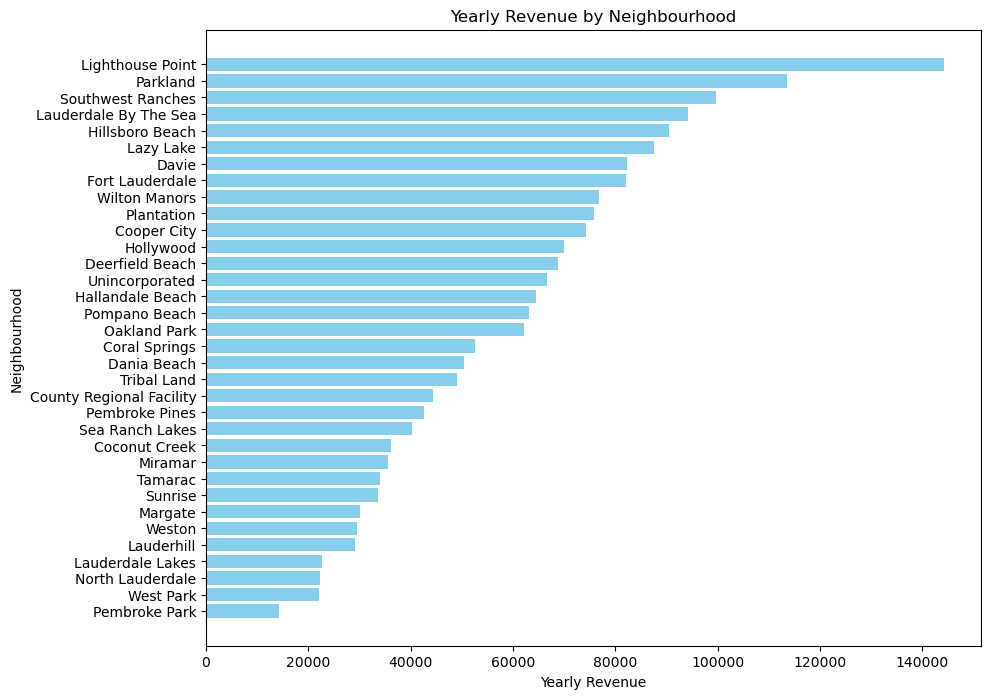

In [60]:
neighbourhoods_df = neighbourhoods_df.sort_values(by='yearly_revenue', ascending=False)

# Create the horizontal bar chart
plt.figure(figsize=(10, 8))
plt.barh(neighbourhoods_df['neighbourhood_cleansed'], neighbourhoods_df['yearly_revenue'], color='skyblue')
plt.xlabel('Yearly Revenue')
plt.ylabel('Neighbourhood')
plt.title('Yearly Revenue by Neighbourhood')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest value at the top
plt.show()

**Best Neighborhood to own an AirBnB**  

- Lighthouse Point is the best neighbourhood to own an AirBnB.  
  1) It has the highest average daily price by a wide margin ($782)
  2) It has one of the lowest 30-day vacancy rate / highest occupancy rates with a much higher daily price than other similar vacancy rate neighborhoods  
  3) It has the highest expected yearly revenue at over $182k per year ( (daily revenue x 30 x 12) x (30-day occupancy rate) ). The next highest revenue neighbourhoud- Pembroke Pines- generates $115k in revenue per year, on average. Yearly revenue is a measure inclusive of both daily price and monthly occupancy rate, expressed in the context of a year



## **b) _What is the highest price you can justify charging for this property to maximize daily revenue?_**

**Solution**  

Lighthouse Point is the highest revenue neighborhood in Broward county and so is seemingly the best place to own an Airbnb. Our ideal Airbnb is 4 bedrooms, however, and so we need to determine an appropriate price range for this listing by using other Lighthouse Point properties of comparable size (as measured by number of bedrooms). We should also filter out any Airbnbs with prices far above or below the standard price of properties in the acceptable size range. 

These two levels of filtering will remove properties that are too large, too small, too cheap, and too expensive from the cost analysis, ensuring that we can price our Airbnb at an ideal rate.

In [ ]:
# Keep only Broward County properties in Lighthouse Point
lighthouse_point = listings_cleaned[listings_cleaned['neighbourhood_cleansed']=='Lighthouse Point']

# Calculate occupancy rates for Lighthouse Point 
lighthouse_point['occupancy_rate_30'] = 1 - lighthouse_point['vacancy_rate_30']
lighthouse_point['occupancy_rate_60'] = 1 - lighthouse_point['vacancy_rate_60']
lighthouse_point['occupancy_rate_90'] = 1 - lighthouse_point['vacancy_rate_90']
lighthouse_point['occupancy_rate_365'] = 1 - lighthouse_point['vacancy_rate_365']

# Remove columns which are irrelevant to further analysis
lighthouse_point.drop(['host_name', 'host_since', 'host_response_time', 'host_identity_verified', 
                       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
                       'host_listings_count', 'host_total_listings_count', 'host_has_profile_pic',
                       'minimum_nights', 'maximum_nights', 'availability_30', 'availability_60', 
                       'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 
                       'number_of_reviews_l30d', 'review_scores_rating', 
                       'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 
                       'review_scores_communication', 'review_scores_value', 'vacancy_rate_30', 'vacancy_rate_60',
                       'vacancy_rate_90', 'vacancy_rate_365',
                       'reviews_per_month', 'bathrooms', 
                       ], axis=1, inplace=True)

**Removing Outliers by Bedroom Quanity and Price**

Creating both a histogram and boxplot of property housing prices in Lighthouse Point shows a number of outliers that are skewing the average price calculation in a higher direction than is ideal for our analysis. While the mean price of all Airbnbs in Lighthouse Point is $780, the median is only $480, clearly indicating a skew. 

By defining boundaries for the data using [(Quartile 1) - (1.5 * the Interquartile range)] as the lower bound and [(Quartile 3) + (1.5 * the Interquartile range)] for the upper bound, we only focus on properties that are within a statistically relevant price range. 

The resulting mean price after filtering out outliers is $521, while the resulting median price is approximately $451. If we want to charge on the higher end of the filtered market range but still within reason, we could set the daily Airbnb price at the 3rd Quartile price of the data post-outlier removal, which is $646. This would put the property in the 75th percentile of prices and would be more than the mean or median rate, but not as high as the most expensive locations. 


In [63]:
# Aggregate occupancy and price statistics for Lighthouse Point
lhp_mean_occ = lighthouse_point['occupancy_rate_30'].mean() * 100
lhp_mean_price = lighthouse_point['price'].mean()
lhp_median_price = lighthouse_point['price'].median()

print(f'Lighthouse Point Airbnbs mean daily price: ${lhp_mean_price:.0f}')
print(f'Lighthouse Point Airbnbs median daily price: ${lhp_median_price:.0f}')
print(f'Lighthouse Point Airbnbs mean occupancy rate (30 days): {lhp_mean_occ:.0f}%')

Lighthouse Point Airbnbs mean daily price: $626
Lighthouse Point Airbnbs median daily price: $437
Lighthouse Point Airbnbs mean occupancy rate (30 days): 64%


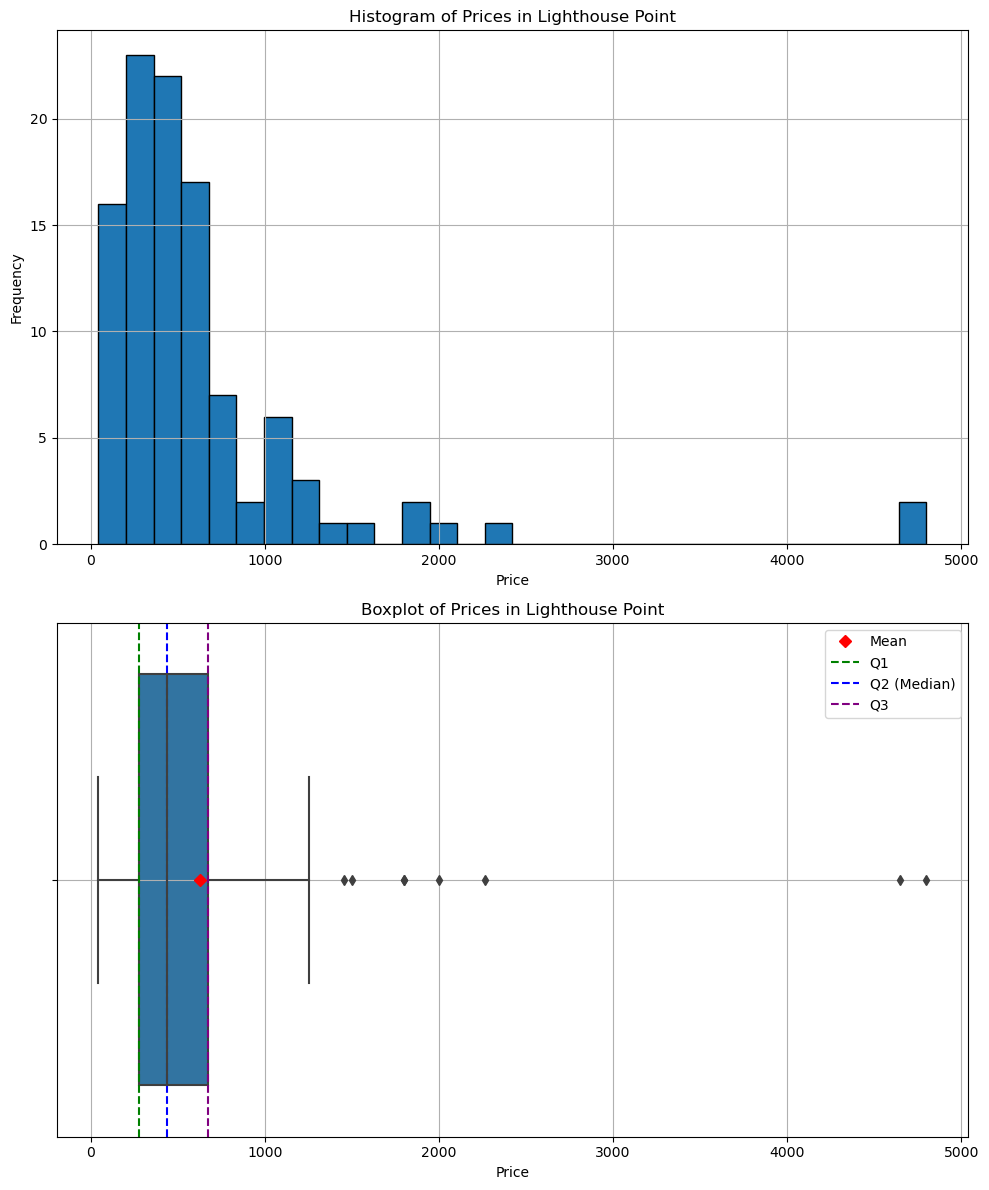

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the quartiles
Q1 = lighthouse_point['price'].quantile(0.25)
Q2 = lighthouse_point['price'].median()
Q3 = lighthouse_point['price'].quantile(0.75)
IQR = Q3 - Q1

# Create a figure with 2 subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 12))

# First subplot: prices histogram
axes[0].hist(lighthouse_point['price'], bins=30, edgecolor='black')
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram of Prices in Lighthouse Point')
axes[0].grid(True)

# Second subplot: Prices boxplot, including mean and quartiles
sns.boxplot(x=lighthouse_point['price'], ax=axes[1])
mean_price = lighthouse_point['price'].mean()

# Add the mean as a red diamond
axes[1].plot(mean_price, 0, 'D', color='red', label='Mean')

# Add lines for Q1, Q2 (median), Q3, and Q4
axes[1].axvline(Q1, color='green', linestyle='--', label='Q1')
axes[1].axvline(Q2, color='blue', linestyle='--', label='Q2 (Median)')
axes[1].axvline(Q3, color='purple', linestyle='--', label='Q3')

# Set labels and title
axes[1].set_xlabel('Price')
axes[1].set_title('Boxplot of Prices in Lighthouse Point')
axes[1].grid(True)

# Add a legend
axes[1].legend()

# Show plots
plt.tight_layout()
plt.show()

In [66]:
top_5 = lighthouse_point[['host_id','bedrooms', 'price']].sort_values('price', ascending=False).head(10)
top_5

,host_id,bedrooms,price
5094,228693114,3.0,4800.0
2430,212146345,3.0,4650.0
12923,303906907,5.0,2263.0
8715,59010125,4.0,2000.0
17187,428787829,6.0,1800.0
2545,247432005,4.0,1800.0
10414,59010125,3.0,1500.0
15731,76276,4.0,1452.0
6604,59010125,3.0,1250.0
5750,59010125,4.0,1250.0


**Filtering out smaller / larger homes**

In [67]:
# First filter out smaller / larger properties to only keep properties with 3-5 bedrooms
LHP_3_5 = lighthouse_point[lighthouse_point['bedrooms'].isin([3,4,5])]
LHP_3_5

,id,host_id,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bedrooms,price,review_scores_location,longterm_vacancy_rate,occupancy_rate_30,occupancy_rate_60,occupancy_rate_90,occupancy_rate_365
559,12093705,64319511,Lighthouse Point,26.292150,-80.087960,Entire home/apt,10,4.0,952.0,4.90000,0.489675,0.600000,0.716667,0.644444,0.169863
719,14881441,22580003,Lighthouse Point,26.290660,-80.092830,Entire home/apt,12,4.0,1000.0,4.77000,0.010173,0.966667,0.983333,0.988889,0.997260
1140,19265829,112867074,Lighthouse Point,26.296490,-80.082760,Entire home/apt,6,3.0,317.0,4.89000,0.373313,0.533333,0.666667,0.777778,0.435616
1168,19655942,52319393,Lighthouse Point,26.296090,-80.087300,Entire home/apt,6,3.0,375.0,4.81000,0.522121,0.500000,0.633333,0.622222,0.178082
1656,23920691,110152379,Lighthouse Point,26.292650,-80.092370,Entire home/apt,6,3.0,275.0,4.86000,0.368519,0.766667,0.883333,0.811111,0.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16970,1010257305032402780,543465148,Lighthouse Point,26.282082,-80.090448,Entire home/apt,6,3.0,700.0,5.00000,0.821588,0.566667,0.283333,0.188889,0.063014
17052,1014430836713702388,23717760,Lighthouse Point,26.285897,-80.090600,Entire home/apt,6,3.0,399.0,4.79257,0.872552,0.133333,0.066667,0.044444,0.271233
17365,1027099864524056660,547009569,Lighthouse Point,26.297646,-80.085423,Entire home/apt,6,3.0,445.0,4.79257,0.433156,0.766667,0.883333,0.655556,0.161644
17501,1031069676368228012,20234196,Lighthouse Point,26.290313,-80.091886,Entire home/apt,10,5.0,710.0,4.79257,0.798503,0.466667,0.316667,0.211111,0.076712


**Filtering out outlier prices**

In [68]:
# Next, filter out all 3-5 bedroom homes with prices outside of the lower and upper bounds as established via the Interquartile range

# Calculate Q1 (25th percentile) and Q3 (75th percentile) of all properties in Lighthouse Point 
Q1 = LHP_3_5['price'].quantile(0.25)
Q3 = LHP_3_5['price'].quantile(0.75)

# Calculate the Interquartile range 
IQR = Q3 - Q1

# Define the lower and upper bounds to filter outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers by price from the subset of Lighthouse Point Airbnbs with 3-5 rooms 
lighthouse_point_filtered = LHP_3_5[(LHP_3_5['price'] >= lower_bound) & (LHP_3_5['price'] <= upper_bound)]

# Display the first few rows of the filtered dataframe
lighthouse_point_filtered


,id,host_id,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bedrooms,price,review_scores_location,longterm_vacancy_rate,occupancy_rate_30,occupancy_rate_60,occupancy_rate_90,occupancy_rate_365
559,12093705,64319511,Lighthouse Point,26.292150,-80.087960,Entire home/apt,10,4.0,952.0,4.90000,0.489675,0.600000,0.716667,0.644444,0.169863
719,14881441,22580003,Lighthouse Point,26.290660,-80.092830,Entire home/apt,12,4.0,1000.0,4.77000,0.010173,0.966667,0.983333,0.988889,0.997260
1140,19265829,112867074,Lighthouse Point,26.296490,-80.082760,Entire home/apt,6,3.0,317.0,4.89000,0.373313,0.533333,0.666667,0.777778,0.435616
1168,19655942,52319393,Lighthouse Point,26.296090,-80.087300,Entire home/apt,6,3.0,375.0,4.81000,0.522121,0.500000,0.633333,0.622222,0.178082
1656,23920691,110152379,Lighthouse Point,26.292650,-80.092370,Entire home/apt,6,3.0,275.0,4.86000,0.368519,0.766667,0.883333,0.811111,0.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16970,1010257305032402780,543465148,Lighthouse Point,26.282082,-80.090448,Entire home/apt,6,3.0,700.0,5.00000,0.821588,0.566667,0.283333,0.188889,0.063014
17052,1014430836713702388,23717760,Lighthouse Point,26.285897,-80.090600,Entire home/apt,6,3.0,399.0,4.79257,0.872552,0.133333,0.066667,0.044444,0.271233
17365,1027099864524056660,547009569,Lighthouse Point,26.297646,-80.085423,Entire home/apt,6,3.0,445.0,4.79257,0.433156,0.766667,0.883333,0.655556,0.161644
17501,1031069676368228012,20234196,Lighthouse Point,26.290313,-80.091886,Entire home/apt,10,5.0,710.0,4.79257,0.798503,0.466667,0.316667,0.211111,0.076712


In [69]:
# 3rd Quartile price of 3-5 bedroom Airbnbs 
Q3

707.5

In [70]:
lhp_new_mean_occ = (lighthouse_point_filtered['occupancy_rate_30'].mean()) * 100
lhp_new_mean_price = lighthouse_point_filtered['price'].mean()
lhp_new_median_price = lighthouse_point_filtered['price'].median()

print(f'Lighthouse Point Airbnbs mean daily price: ${lhp_new_mean_price:.0f}')
print(f'Lighthouse Point Airbnbs median daily price: ${lhp_new_median_price:.0f}')
print(f'Lighthouse Point Airbnbs mean occupancy rate (30 days): {lhp_new_mean_occ:.0f}%')

Lighthouse Point Airbnbs mean daily price: $486
Lighthouse Point Airbnbs median daily price: $445
Lighthouse Point Airbnbs mean occupancy rate (30 days): 63%


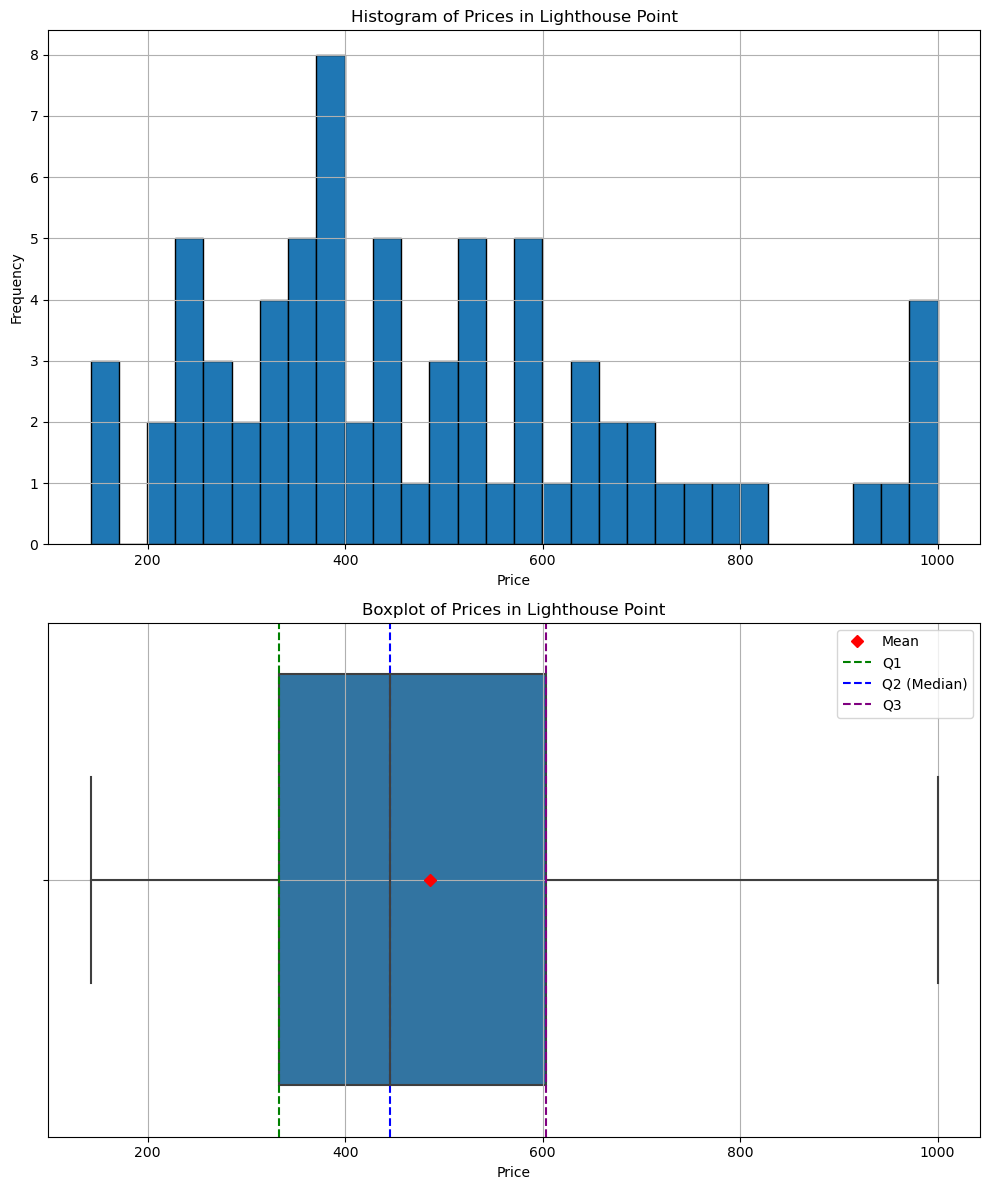

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the quartiles
Q1 = lighthouse_point_filtered['price'].quantile(0.25)
Q2 = lighthouse_point_filtered['price'].median()
Q3 = lighthouse_point_filtered['price'].quantile(0.75)
IQR = Q3 - Q1

# Create a figure with 2 subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 12))

# First subplot: prices histogram
axes[0].hist(lighthouse_point_filtered['price'], bins=30, edgecolor='black')
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram of Prices in Lighthouse Point')
axes[0].grid(True)

# Second subplot: Prices boxplot, including mean and quartiles
sns.boxplot(x=lighthouse_point_filtered['price'], ax=axes[1])
mean_price = lighthouse_point_filtered['price'].mean()

# Add the mean as a red diamond
axes[1].plot(mean_price, 0, 'D', color='red', label='Mean')

# Add lines for Q1, Q2 (median), Q3, and Q4
axes[1].axvline(Q1, color='green', linestyle='--', label='Q1')
axes[1].axvline(Q2, color='blue', linestyle='--', label='Q2 (Median)')
axes[1].axvline(Q3, color='purple', linestyle='--', label='Q3')

# Set labels and title
axes[1].set_xlabel('Price')
axes[1].set_title('Boxplot of Prices in Lighthouse Point')
axes[1].grid(True)

# Add a legend
axes[1].legend()

# Show plots
plt.tight_layout()
plt.show()

In [72]:
Q1 = lighthouse_point['price'].quantile(0.25)
Q3 = lighthouse_point['price'].quantile(0.75)
print(f"Q1 (25th percentile): {Q1}")
print(f"Q3 (75th percentile): {Q3}")

Q1 (25th percentile): 273.25
Q3 (75th percentile): 670.0


In [73]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1_filtered = lighthouse_point_filtered['price'].quantile(0.25)
Q3_filtered = lighthouse_point_filtered['price'].quantile(0.75)

# Calculate the IQR
IQR_filtered = Q3 - Q1

# The 3rd quartile (75th percentile) price of Airbnbs after filtering 
Q3_filtered

603.0

**Post price filtering neighbourhood comparison**  

Another approach to confirm Lighthouse Point is the best location to invest in a property while accounting to outlier prices is to filter out outlier prices from each neighbourhood in Broward County and then compare yearly revenue for a more accurate comparison.

Even after filtering out price outliers from the entire dataset and comparing neighbourhoods afterward, Lighthouse Point still has the highest daily price and yearly revenue, further confirmation that it is the best option to invest in regardless of whether the most and least expensive houses are considered or not.

In [74]:
# Define the IQR filter function
def iqr_filter(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Group by 'neighbourhood_cleansed' and apply the IQR filter
filtered_groups = listings_cleaned.groupby('neighbourhood_cleansed').apply(lambda x: iqr_filter(x, 'price'))

# Reset the index after grouping and filtering
filtered_groups = filtered_groups.reset_index(drop=True)

# Calculate the average price per neighborhood after filtering out outliers
average_prices = filtered_groups.groupby('neighbourhood_cleansed').agg(
    average_price=('price', 'mean'),
    average_occupancy_rate_30=('vacancy_rate_30', lambda x: 1 - x.mean())
).reset_index()

# Calculate yearly revenue
average_prices['yearly_revenue'] = (average_prices['average_price'] * 30 * average_prices['average_occupancy_rate_30'] * 12).round(0)

# Display the average prices and yearly revenue per neighborhood
average_prices = average_prices.sort_values('yearly_revenue', ascending=False)
average_prices

,neighbourhood_cleansed,average_price,average_occupancy_rate_30,yearly_revenue
15,Lighthouse Point,467.291667,0.658681,110807.0
9,Hillsboro Beach,289.350000,0.854167,88975.0
14,Lazy Lake,332.833333,0.727778,87202.0
20,Parkland,293.533333,0.673333,71152.0
26,Southwest Ranches,386.066667,0.467778,65014.0
33,Wilton Manors,272.850598,0.654316,64271.0
11,Lauderdale By The Sea,263.607895,0.667544,63349.0
1,Cooper City,257.695652,0.639130,59292.0
6,Deerfield Beach,245.887006,0.638183,56491.0
10,Hollywood,264.608068,0.580619,55309.0


**Mapping Lighthouse Point Airbnbs**

In [96]:
# All Airbnbs in Lighthouse Point
lighthouse_point.head()

,id,host_id,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,price,review_scores_location,longterm_vacancy_rate,occupancy_rate_30,occupancy_rate_60,occupancy_rate_90,occupancy_rate_365
258,6231165,22267267,Lighthouse Point,26.26663,-80.09807,Private room,1,43.0,4.64,0.677651,0.233333,0.116667,0.077778,0.772603
559,12093705,64319511,Lighthouse Point,26.29215,-80.08796,Entire home/apt,10,952.0,4.90,0.489675,0.600000,0.716667,0.644444,0.169863
719,14881441,22580003,Lighthouse Point,26.29066,-80.09283,Entire home/apt,12,1000.0,4.77,0.010173,0.966667,0.983333,0.988889,0.997260
1140,19265829,112867074,Lighthouse Point,26.29649,-80.08276,Entire home/apt,6,317.0,4.89,0.373313,0.533333,0.666667,0.777778,0.435616
1168,19655942,52319393,Lighthouse Point,26.29609,-80.08730,Entire home/apt,6,375.0,4.81,0.522121,0.500000,0.633333,0.622222,0.178082


In [97]:
# All 3-5 bedroom Airbnbs in Lighthouse Point
LHP_3_5.head()

,id,host_id,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bedrooms,price,review_scores_location,longterm_vacancy_rate,occupancy_rate_30,occupancy_rate_60,occupancy_rate_90,occupancy_rate_365
559,12093705,64319511,Lighthouse Point,26.29215,-80.08796,Entire home/apt,10,4.0,952.0,4.90,0.489675,0.600000,0.716667,0.644444,0.169863
719,14881441,22580003,Lighthouse Point,26.29066,-80.09283,Entire home/apt,12,4.0,1000.0,4.77,0.010173,0.966667,0.983333,0.988889,0.997260
1140,19265829,112867074,Lighthouse Point,26.29649,-80.08276,Entire home/apt,6,3.0,317.0,4.89,0.373313,0.533333,0.666667,0.777778,0.435616
1168,19655942,52319393,Lighthouse Point,26.29609,-80.08730,Entire home/apt,6,3.0,375.0,4.81,0.522121,0.500000,0.633333,0.622222,0.178082
1656,23920691,110152379,Lighthouse Point,26.29265,-80.09237,Entire home/apt,6,3.0,275.0,4.86,0.368519,0.766667,0.883333,0.811111,0.200000


In [98]:
# All Lighthouse Point 3-5 bedroom Airbnbs within the interquartile price range 
lighthouse_point_filtered.head()

,id,host_id,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bedrooms,price,review_scores_location,longterm_vacancy_rate,occupancy_rate_30,occupancy_rate_60,occupancy_rate_90,occupancy_rate_365
559,12093705,64319511,Lighthouse Point,26.29215,-80.08796,Entire home/apt,10,4.0,952.0,4.90,0.489675,0.600000,0.716667,0.644444,0.169863
719,14881441,22580003,Lighthouse Point,26.29066,-80.09283,Entire home/apt,12,4.0,1000.0,4.77,0.010173,0.966667,0.983333,0.988889,0.997260
1140,19265829,112867074,Lighthouse Point,26.29649,-80.08276,Entire home/apt,6,3.0,317.0,4.89,0.373313,0.533333,0.666667,0.777778,0.435616
1168,19655942,52319393,Lighthouse Point,26.29609,-80.08730,Entire home/apt,6,3.0,375.0,4.81,0.522121,0.500000,0.633333,0.622222,0.178082
1656,23920691,110152379,Lighthouse Point,26.29265,-80.09237,Entire home/apt,6,3.0,275.0,4.86,0.368519,0.766667,0.883333,0.811111,0.200000


## **c) _What’s the expected daily revenue per bedroom for your property?_**     

Setting the target daily price for our Airbnb at the 75th percentile price of $646 ensures that we can still profit off of the Airbnb since it is not so high as to disuade guests from booking while also ensuring we are making more than the average Airbnb on the market. Multiplying this daily rate by the 30 day occupancy rate ensures that we account for the loss in revenue due to vacancy in a daily contexst. Dividing this number by the bedroom count of our Airnb (4) gives the expected daily revenue per bedroom, which is $103.


In [78]:
# 3rd Quartile price of Lighthouse Point properties after size / price filtering. 
# This is the target daily price for our Airbnb as it is higher than 75% of the neighbourhood listings 
Q3_filtered

603.0

In [79]:
num_rooms = 4
LHP_occupancy = lighthouse_point_filtered['occupancy_rate_30'].mean()
expected_revenue = (Q3_filtered * LHP_occupancy  / num_rooms).round(0)

print(f'Expected daily revenue per bedroom for a {num_rooms} bedroom Airbnb: ${expected_revenue}')

Expected daily revenue per bedroom for a 4 bedroom Airbnb: $95.0


## **d) _Additional Methods to Maximize Revenue_**

**Methodology:**  

To further maximize revenue for our Airbnb, search for areas within Lighthouse Point with the highest concentration of highly priced Airbnbs. We can chose these specific locations to purchase an Airbnb in order to maximize the potential revenue. This analysis is agnostic of the size / price of surrounding Airbnbs and assumes that higher priced Airbnbs will generally positively affect the price of your own Airbnb. If our 4 bedroom Airbnb is surrounded by the beachfront villas and 10-bedroom mansions in the southeastern earea of Lighthouse Point, for instance, we can charge a higher daily rate than if the same Airbnb was located further inland. 

Based on the below heatmap which highlights clusters of the highest priced properties in LighthousePoint, the central section of Lighthouse Point appears to be an ideal location for an Airbnb. 

In [80]:
# Remove any NA values
lighthouse_point = lighthouse_point.dropna(subset=['price'])

In [81]:
import folium 
from folium.plugins import HeatMap

'''
Create heatmap to show best locations to own an Airbnb within Lighthouse Point 
by showing concentrated areas of higher prices
'''


# Aggregate data to calculate the average price at each location
avg_price_data = lighthouse_point.groupby(['latitude', 'longitude']).price.mean().reset_index()

# Initialize a map centered around the average coordinates
map_center = [avg_price_data['latitude'].mean(), avg_price_data['longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=13)

# Prepare data for the heatmap
heat_data = avg_price_data[['latitude', 'longitude', 'price']].values.tolist()

# Add heatmap layer
HeatMap(heat_data, max_val=avg_price_data['price'].max()).add_to(m)

# Display the map in the Jupyter Notebook
m

/var/folders/8l/wfcnp0896lb8kt5vxf_y7dqr0000gn/T/ipykernel_77971/3427695861.py:21: UserWarning: The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.
  HeatMap(heat_data, max_val=avg_price_data['price'].max()).add_to(m)


In [82]:

# Aggregate data to calculate the average price at each location
avg_price_data = lighthouse_point.groupby(['latitude', 'longitude']).price.mean().reset_index()

# Initialize a map centered around the average coordinates
map_center = [avg_price_data['latitude'].mean(), avg_price_data['longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=13)

# Prepare data for the heatmap
heat_data = avg_price_data[['latitude', 'longitude', 'price']].values.tolist()

# Add heatmap layer
HeatMap(heat_data, max_val=avg_price_data['price'].max()).add_to(m)

# Add a marker for each latitude and longitude in the dataframe with price annotation
for _, row in lighthouse_point.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"Price: ${row['price']}"
    ).add_to(m)

# Display the map in the Jupyter Notebook
m

/var/folders/8l/wfcnp0896lb8kt5vxf_y7dqr0000gn/T/ipykernel_77971/948577575.py:12: UserWarning: The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.
  HeatMap(heat_data, max_val=avg_price_data['price'].max()).add_to(m)
